In [118]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 200)
pd.set_option('mode.chained_assignment',None)

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [119]:
sample_df= pd.read_csv("C:\Downloads/covid_hospitalization_sample.csv", encoding='windows-1252')


In [120]:
#Data Selection and reduction
df = sample_df[['Patient age quantile', 'SARS-Cov-2 exam result', 'Influenza A rapid test','Influenza B rapid test', 'Hemoglobin', 
    'Hematocrit','Lymphocytes','Leukocytes','Basophils', 'Eosinophils', 'Monocytes', 'Neutrophils','Proteina C reativa',
    'Platelets', 'Mean platelet volume', 'Red blood Cells', 'Red blood cell distribution width','Mean corpuscular volume',
    'Mean corpuscular hemoglobin', 'Mean corpuscular hemoglobin concentration']]


In [121]:
print(df.isnull().sum())

Patient age quantile                            0
SARS-Cov-2 exam result                          0
Influenza A rapid test                        955
Influenza B rapid test                        955
Hemoglobin                                   1028
Hematocrit                                   1028
Lymphocytes                                  1028
Leukocytes                                   1028
Basophils                                    1028
Eosinophils                                  1028
Monocytes                                    1028
Neutrophils                                  1051
Proteina C reativa                           1055
Platelets                                    1028
Mean platelet volume                         1030
Red blood Cells                              1028
Red blood cell distribution width            1028
Mean corpuscular volume                      1028
Mean corpuscular hemoglobin                  1028
Mean corpuscular hemoglobin concentration    1028


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient age quantile                       1230 non-null   int64  
 1   SARS-Cov-2 exam result                     1230 non-null   object 
 2   Influenza A rapid test                     275 non-null    object 
 3   Influenza B rapid test                     275 non-null    object 
 4   Hemoglobin                                 202 non-null    float64
 5   Hematocrit                                 202 non-null    float64
 6   Lymphocytes                                202 non-null    float64
 7   Leukocytes                                 202 non-null    float64
 8   Basophils                                  202 non-null    float64
 9   Eosinophils                                202 non-null    float64
 10  Monocytes               

In [123]:
#Correcting errorneous/invalid values
#impute 0 age quantile and impute with mean
impute_val = df['Patient age quantile'] == 0 
df.loc[impute_val, 'Patient age quantile'] = np.mean(df['Patient age quantile'])


In [124]:
#unique values in SARS-Cov-2 exam result
df['SARS-Cov-2 exam result'].value_counts()

negative    672
positive    558
Name: SARS-Cov-2 exam result, dtype: int64

In [125]:
# Covid-19 positive cases probability.
prop = (df['SARS-Cov-2 exam result'].value_counts()['positive']/df.shape[0])*100
print("There are", prop, "COVID-19 positive cases")

There are 45.36585365853659 COVID-19 positive cases


In [126]:
#Data Cleaning
#setting correct type to variables
#Patient age quantile should be changed from interval(integer) into categorical(string) variable.
df['Patient age quantile'] = df['Patient age quantile'].astype(str)

In [127]:
#as it shows either person is positive or not it must be formatted into binary variable using map function.
Cov_2_exam_result = {'negative': 0, 'positive':1}
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].map(Cov_2_exam_result)

In [128]:
#Data integration as mentioned and then imputation of missing values in all feature variables of influenza test with mode and regular blood test with mean.
#It is useful as later easily can impute by defining a function.
patnt_records = ['Patient age quantile', 'SARS-Cov-2 exam result']
influenza_test = ['Influenza A rapid test', 'Influenza B rapid test']
regBlood_test = ['Proteina C reativa', 'Neutrophils', 'Monocytes', 'Platelets', 'Eosinophils', 'Basophils', 'Leukocytes', 
                 'Lymphocytes', 'Hemoglobin', 'Hematocrit', 'Mean corpuscular hemoglobin', 'Mean corpuscular hemoglobin concentration',
                 'Mean corpuscular volume', 'Mean platelet volume',  'Red blood cell distribution width', 'Red blood Cells']   
                    
combine_data = patnt_records + influenza_test + regBlood_test
data_split = df[combine_data]


In [135]:
data_split.describe()

SARS-Cov-2 exam result  Proteina C reativa  Neutrophils    Monocytes  \
count             1230.000000         1230.000000  1230.000000  1230.000000   
mean                 0.453659            0.119012     0.097528     0.347405   
std                  0.498050            0.390591     0.368174     0.440146   
min                  0.000000           -0.535362    -3.339775    -2.058669   
25%                  0.000000            0.119012     0.097528     0.347405   
50%                  0.000000            0.119012     0.097528     0.347405   
75%                  1.000000            0.119012     0.097528     0.347405   
max                  1.000000            5.946270     2.085213     3.640448   

         Platelets  Eosinophils    Basophils   Leukocytes  Lymphocytes  \
count  1230.000000  1230.000000  1230.000000  1230.000000  1230.000000   
mean     -0.384146    -0.262662    -0.113378    -0.338022    -0.137305   
std       0.293649     0.338647     0.319979     0.368008     0.396662   
min      -2.062515    -0.835508    -1.140144    -1.658539    -1.779779   
25%      -0.384146    -0.262662    -0.113378    -0.338022    -0.137305   
50%      -0.384146    -0.262662    -0.113378    -0.338022    -0.137305   
75%      -0.384146    -0.262662    -0.113378    -0.338022    -0.137305   
max       1.756275     6.918138     3.136283     4.455255     3.764100   

        Hemoglobin   Hematocrit  Mean corpuscular hemoglobin  \
count  1230.000000  1230.000000                  1230.000000   
mean      0.169350     0.173855                     0.022913   
std       0.343178     0.346768                     0.372772   
min      -2.152643    -2.418559                    -5.519430   
25%       0.169350     0.173855                     0.022913   
50%       0.169350     0.173855                     0.022913   
75%       0.169350     0.173855                     0.022913   
max       2.045308     2.090489                     1.903138   

       Mean corpuscular hemoglobin concentration  Mean corpuscular volume  \
count                                1230.000000              1230.000000   
mean                                    0.033161                 0.011707   
std                                     0.348198                 0.388334   
min                                    -3.440245                -5.101581   
25%                                     0.033161                 0.011707   
50%                                     0.033161                 0.011707   
75%                                     0.033161                 0.011707   
max                                     3.331071                 2.109059   

       Mean platelet volume  Red blood cell distribution width  \
count           1230.000000                        1230.000000   
mean               0.091455                          -0.127615   
std                0.381632                           0.313726   
min               -1.896609                          -1.332725   
25%                0.091455                          -0.127615   
50%                0.091455                          -0.127615   
75%                0.091455                          -0.127615   
max                3.713052                           4.947686   

       Red blood Cells  
count      1230.000000  
mean          0.148437  
std           0.361606  
min          -1.907856  
25%           0.148437  
50%           0.148437  
75%           0.148437  
max           2.975753

In [136]:
#define function to save extra work
def imputMean_value(colmn):
    data_split[colmn].fillna(data_split[colmn].mean(), inplace=True)
   

In [137]:
mean_list = data_split.columns.tolist()
for colmn in regBlood_test:
    imputMean_value(colmn)
data_split['Influenza A rapid test'].fillna(data_split['Influenza A rapid test'].mode()[0], inplace=True)
data_split['Influenza B rapid test'].fillna(data_split['Influenza B rapid test'].mode()[0], inplace=True)

In [138]:
data_split

Patient age quantile  SARS-Cov-2 exam result Influenza A rapid test  \
0                     9.0                       0               negative   
1                    16.0                       0               negative   
2                     9.0                       0               negative   
3       9.426829268292684                       0               negative   
4                    10.0                       0               negative   
5                     3.0                       0               negative   
6       9.426829268292684                       0               negative   
7                     2.0                       0               negative   
8                     2.0                       0               negative   
9                     1.0                       0               negative   
10                    6.0                       0               negative   
11                    1.0                       0               negative   
12      9.426829268292684                       0               negative   
13                    3.0                       0               negative   
14                    2.0                       0               negative   
15                    8.0                       0               negative   
16                   10.0                       0               negative   
17                    2.0                       0               negative   
18                    5.0                       0               negative   
19                    2.0                       0               negative   
20                   13.0                       0               negative   
21                    2.0                       0               negative   
22                   18.0                       0               negative   
23                    1.0                       0               negative   
24                   11.0                       0               negative   
25                   10.0                       0               negative   
26                    2.0                       0               negative   
27                    2.0                       0               negative   
28                    9.0                       0               negative   
29      9.426829268292684                       0               negative   
30                    1.0                       0               negative   
31                    6.0                       0               negative   
32                    1.0                       0               negative   
33                    1.0                       0               negative   
34                    1.0                       0               negative   
35                    2.0                       0               negative   
36                    4.0                       0               negative   
37                    9.0                       0               negative   
38                   16.0                       0               negative   
39                    1.0                       0               negative   
40      9.426829268292684                       0               negative   
41                    3.0                       0               negative   
42                   12.0                       0               negative   
43                   13.0                       0               negative   
44                    4.0                       0               negative   
45                    4.0                       0               negative   
46      9.426829268292684                       0               negative   
47                    9.0                       0               positive   
48                   12.0                       0               positive   
49                    1.0                       0               positive   
50                    6.0                       0               positive   
51                    2.0                       0    

In [139]:
#Formatting Categorical value using one-hot encoding to convert categorical variables into binary variables.
#It is necessary as sklearn models accept only numerical matrices.

print("before:", len(data_split.columns))

#one hot encoding
clean_df = pd.get_dummies(data_split)


print("After:", len(clean_df.columns))

before: 20
After: 41


In [140]:
clean_df

SARS-Cov-2 exam result  Proteina C reativa  Neutrophils  Monocytes  \
0                          0            0.119012     0.097528   0.347405   
1                          0           -0.316791    -0.356851   1.250496   
2                          0            0.119012     0.097528   0.347405   
3                          0           -0.342622     0.097528  -1.270772   
4                          0            0.119012     0.097528   0.347405   
5                          0           -0.396271     0.806817   0.672705   
6                          0            0.119012     0.097528   0.347405   
7                          0            0.119012     0.097528   0.347405   
8                          0            0.119012     0.097528   0.347405   
9                          0            0.119012     0.097528   0.347405   
10                         0            0.119012     0.097528   0.347405   
11                         0            0.119012     0.097528   0.347405   
12                         0            0.119012     0.097528   0.347405   
13                         0            0.119012     0.097528   0.347405   
14                         0            0.119012     0.097528   0.347405   
15                         0            0.119012     0.097528   0.347405   
16                         0           -0.519466     0.097528   1.092916   
17                         0            0.119012     0.097528   0.347405   
18                         0            0.293222     2.085213  -0.798034   
19                         0            0.119012     0.097528   0.347405   
20                         0            0.119012     0.097528   0.347405   
21                         0            0.119012     0.097528   0.347405   
22                         0            0.119012     0.097528   0.347405   
23                         0            0.119012     0.097528   0.347405   
24                         0            0.119012     0.097528   0.347405   
25                         0           -0.376401    -0.709230   2.826288   
26                         0            0.119012     0.097528   0.347405   
27                         0            0.119012     0.097528   0.347405   
28                         0           -0.231349    -1.069803   0.016125   
29                         0            0.119012     0.097528   0.347405   
30                         0            0.119012     0.097528   0.347405   
31                         0            0.119012     0.097528  -0.220244   
32                         0            0.119012     0.097528   0.347405   
33                         0            0.119012     0.097528   0.347405   
34                         0            0.119012     0.097528   0.347405   
35                         0           -0.191609     0.257762  -0.299034   
36                         0            0.119012     0.097528   0.347405   
37                         0            0.119012     0.097528   0.347405   
38                         0           -0.521453    -0.774788  -0.456613   
39                         0            4.593115     0.097528   1.355549   
40                         0            0.119012     0.097528   0.347405   
41                         0            0.119012     0.097528   0.347405   
42                         0            0.119012     0.097528   0.347405   
43                         0            0.119012     0.097528   0.347405   
44                         0            0.119012     0.097528   0.347405   
45                         0            1.564909     0.097528  -0.482876   
46                         0            4.970647     0.097528  -1.533404   
47                         0            0.119012     0.880570   1.276759   
48                         0            0.119012     0.097528   0.347405   
49                         0            0.119012     0.097528   0.347405   
50                         0            0.119012     0.097528   0.347405   
51                         0            0.119012     0

In [141]:
#Data Split
#In this dataset, we aim to classify whether a person has resulted positive to COVID-19 based on given characteristics
#and what characteristics are influential for the result.
#Hence, it corresponds to the variable SARS-Cov-2 exam result and hence it will be out target variable.
#Input variables define as X and target variable as y. And so, y will be SARS-Cov-2 exam result and rest as input variables.

#target/input split
y = clean_df['SARS-Cov-2 exam result']
x = clean_df.drop(['SARS-Cov-2 exam result'], axis = 1)


In [142]:
#now convert x into a numpy matrix for sklearn module to consume by using .to_numpy() function.
x_mat = x.to_numpy()

In [143]:
#Data Distribution/Data partition into validation, traing and test dataset using k-fold cross validation method.
#Split data into train_set and test_set using sklearn module which contains train_test_split

from sklearn.model_selection import train_test_split

In [144]:
#Now we partition data into 80/20 configuration for cross validation.
#In addition we will use stratification sampling to ensure equal ratio of positive and negative targets in both sets.
#It is also necessary to set a consistent random state which contains random seed number to generate the shuffling of dataset before splitting.

#Hence, first let's set a random state with random seed which will make sure that the algorithm is running smoothly along multiple runs.

rs = 10
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.2, stratify = y , random_state = rs)


In [145]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(984, 40)
(246, 40)
(984,)
(246,)


# Decision Tree Model

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#Decision tree building
#1). Batch Processing split to split data into 80% training set and 20% testing set. 
#Because the proportion of positive less than negative to define characteristics of positive it is necessary to keep train data
#is increased so that it will be easy to get resultant answer after comparing it with so many variables.

rs = 10
#Default decision tree model building
model = DecisionTreeClassifier(random_state = rs)
model.fit(x_train, y_train)
model.score(x_test, y_test) #shows how good our model is?

0.7032520325203252

In [147]:
#to check the quality w.r.t. default model performance by accuracy of model.
print("training set accuracy:", model.score(x_train, y_train))

training set accuracy: 0.7398373983739838


In [148]:
#check testing data
print("testing set accuracy:", model.score(x_test, y_test))

testing set accuracy: 0.7032520325203252


#### Defining tree structure

In [149]:

n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold
n_nodes

121

In [150]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 121 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 16] <= 0.5 else to node 112.
	node=1 test node: go to node 2 if X[:, 38] <= 0.5 else to node 7.
		node=2 test node: go to node 3 if X[:, 26] <= 0.5 else to node 6.
			node=3 test node: go to node 4 if X[:, 18] <= 0.5 else to node 5.
				node=4 leaf node.
				node=5 leaf node.
			node=6 leaf node.
		node=7 test node: go to node 8 if X[:, 36] <= 0.5 else to node 9.
			node=8 leaf node.
			node=9 test node: go to node 10 if X[:, 6] <= -0.33180201053619385 else to node 95.
				node=10 test node: go to node 11 if X[:, 35] <= 0.5 else to node 92.
					node=11 test node: go to node 12 if X[:, 27] <= 0.5 else to node 89.
						node=12 test node: go to node 13 if X[:, 4] <= -0.5405320227146149 else to node 24.
							node=13 test node: go to node 14 if X[:, 13] <= 2.3667335510253906 else to node 21.
								node=14 test node: go to node 15 if X[:, 11] <= -1.1997358798980713 else 

In [151]:
# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = model.decision_path(x_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = model.apply(x_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (x_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (x_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             x_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

Rules used to predict sample 0: 
decision id node 0 : (x_test[0, 16] (= 0.0) <= 0.5)
decision id node 1 : (x_test[0, 38] (= 1.0) > 0.5)
decision id node 7 : (x_test[0, 36] (= 1.0) > 0.5)
decision id node 9 : (x_test[0, 6] (= -0.692910492) <= -0.33180201053619385)
decision id node 10 : (x_test[0, 35] (= 0.0) <= 0.5)
decision id node 11 : (x_test[0, 27] (= 0.0) <= 0.5)
decision id node 12 : (x_test[0, 4] (= -0.287695765) > -0.5405320227146149)
decision id node 24 : (x_test[0, 24] (= 0.0) <= 0.5)
decision id node 25 : (x_test[0, 26] (= 0.0) <= 0.5)
decision id node 26 : (x_test[0, 29] (= 1.0) > 0.5)
decision id node 76 : (x_test[0, 6] (= -0.692910492) <= -0.5746419429779053)

The following samples [0, 1] share the node [ 0  1  7  9 10 11 12 24 25 26] in the tree
It is 8.264462809917354 % of all nodes.


#### Model performs better on training data than test data but also overfits on the training data. Therefore, we need to tune the hyperparameters of the model and ensure it can generalise better to the test set to find an optimal tree.

In [152]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       134
           1       0.68      0.67      0.67       112

    accuracy                           0.70       246
   macro avg       0.70      0.70      0.70       246
weighted avg       0.70      0.70      0.70       246



In [153]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = x.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)


for i in indices:
    print(feature_names[i], ':', importances[i])

Patient age quantile_1.0 : 0.11708646475452185
Leukocytes : 0.11141339602982621
Influenza A rapid test_negative : 0.09329991100175455
Influenza B rapid test_negative : 0.089631567266309
Eosinophils : 0.06813915633242967
Patient age quantile_2.0 : 0.06657062792388743
Patient age quantile_9.426829268292684 : 0.06636473030325511
Patient age quantile_17.0 : 0.03875289504166103
Patient age quantile_19.0 : 0.03673360636581933
Monocytes : 0.034450690740728325
Mean platelet volume : 0.03138396388151197
Basophils : 0.031039635318884793
Mean corpuscular hemoglobin concentration : 0.020554760863663545
Patient age quantile_5.0 : 0.01968146018909326
Lymphocytes : 0.01891967427417818
Patient age quantile_4.0 : 0.0169716832397511
Patient age quantile_14.0 : 0.016006860214475272
Hematocrit : 0.015011130186489129
Patient age quantile_3.0 : 0.01362460109029413
Patient age quantile_13.0 : 0.013201522856224722
Mean corpuscular volume : 0.010806765638030142
Patient age quantile_11.0 : 0.01074913302467284
M

In [154]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=x.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("data_viz.png") # saved in the following file - will return True if successful

TypeError: 'Dot' object is not subscriptable

In [155]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualization

# dotfile = StringIO()
# export_graphviz(model, out_file=dotfile, feature_names=x.columns)
# graph = pydot.graph_from_dot_data(dotfile.getvalue())
export_graphviz(model, out_file=('covid_dt.dot'), feature_names=x.columns, class_names=None, filled=True)
!dot -Tpng covid_dt.dot -o covid.png

## GridSearchCV

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 4),
          'min_samples_leaf': range(0, 20, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs =-1)
cv_1.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [158]:
cv_1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [159]:
cv_1.best_score_

0.5670789527932386

In [160]:
cv_1.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [162]:

n_nodes = cv_1.node_count
children_left = cv_1.children_left
children_right = cv_1.children_right
feature = cv_1.feature
threshold = cv_1.threshold
n_nodes

AttributeError: 'GridSearchCV' object has no attribute 'node_count'

In [163]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.00156002, 0.00156   , 0.00780001, 0.00468001, 0.00467997,
       0.00311999, 0.00780001, 0.00467999, 0.00780003, 0.00468001,
       0.00311999, 0.00311999, 0.00312002, 0.00634   , 0.00467999,
       0.00624001, 0.00311999, 0.00468001]), 'std_fit_time': array([0.00468006, 0.00467999, 0.00780001, 0.00714884, 0.00714877,
       0.00623999, 0.00780001, 0.0071488 , 0.00780003, 0.00714884,
       0.00623999, 0.00623999, 0.00624003, 0.00776972, 0.0071488 ,
       0.00764242, 0.00623999, 0.00714884]), 'mean_score_time': array([0.        , 0.00156002, 0.        , 0.        , 0.00312004,
       0.00311999, 0.        , 0.00311999, 0.        , 0.00312004,
       0.00311999, 0.00156   , 0.00156002, 0.00156   , 0.        ,
       0.        , 0.00156002, 0.00156   ]), 'std_score_time': array([0.        , 0.00468006, 0.        , 0.        , 0.00624008,
       0.00623999, 0.        , 0.00623999, 0.        , 0.00624008,
       0.00623999, 0.00467999, 0.00468006, 0.00467999, 0.

Total number of models:  18


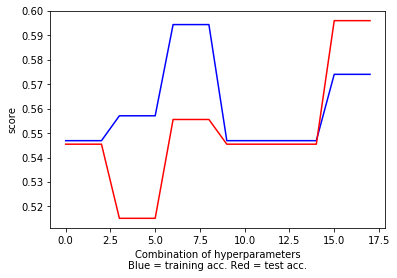

In [164]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

Total number of models are 108 means total combination of hyperparameters is 108.

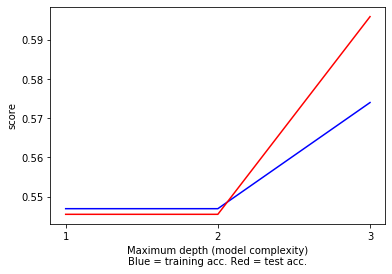

In [165]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


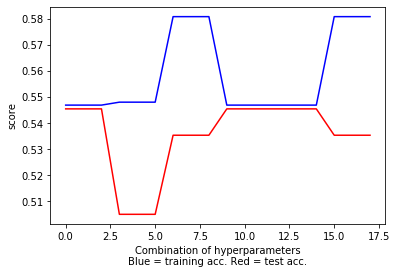

In [166]:
import matplotlib.pyplot as plt

train_result = result_set['split1_train_score']
test_result = result_set['split1_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

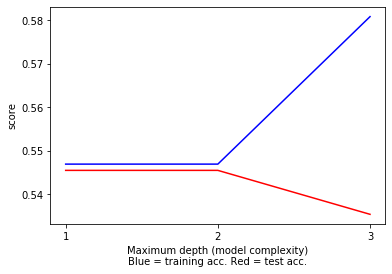

In [167]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


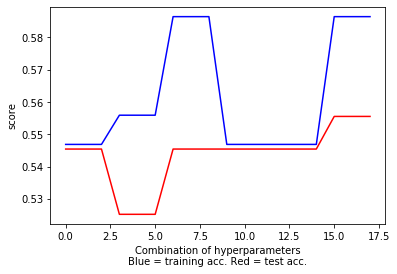

In [168]:
import matplotlib.pyplot as plt

train_result = result_set['split2_train_score']
test_result = result_set['split2_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

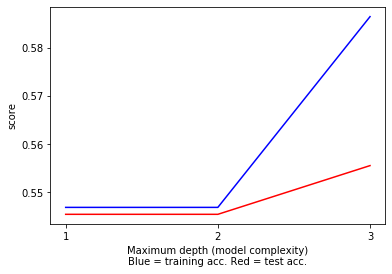

In [169]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


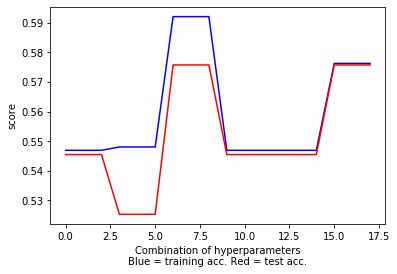

In [170]:
import matplotlib.pyplot as plt

train_result = result_set['split3_train_score']
test_result = result_set['split3_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

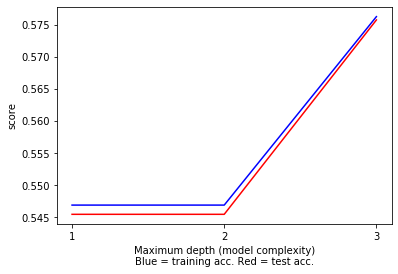

In [171]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


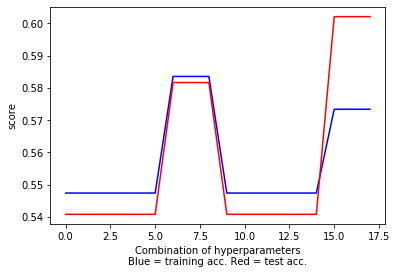

In [172]:
import matplotlib.pyplot as plt

train_result = result_set['split4_train_score']
test_result = result_set['split4_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

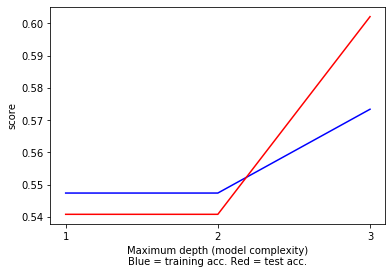

In [173]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


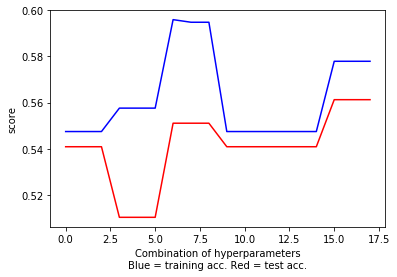

In [174]:
import matplotlib.pyplot as plt

train_result = result_set['split5_train_score']
test_result = result_set['split5_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

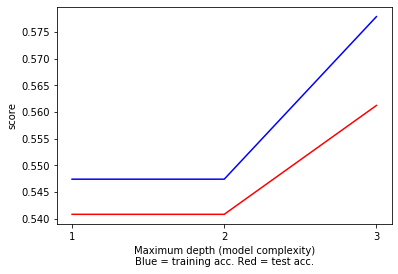

In [175]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


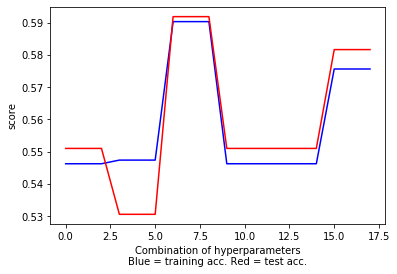

In [176]:
import matplotlib.pyplot as plt

train_result = result_set['split6_train_score']
test_result = result_set['split6_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

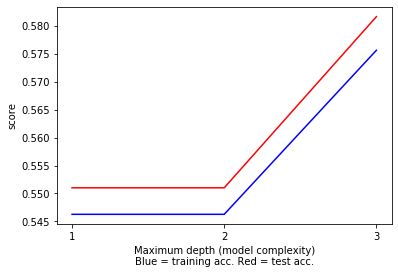

In [177]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


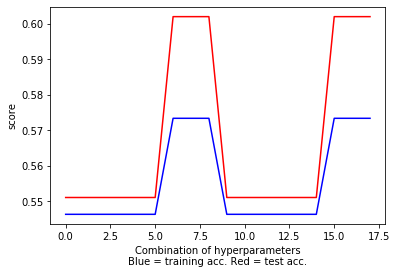

In [178]:
import matplotlib.pyplot as plt

train_result = result_set['split7_train_score']
test_result = result_set['split7_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

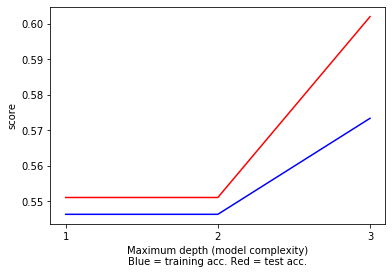

In [179]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


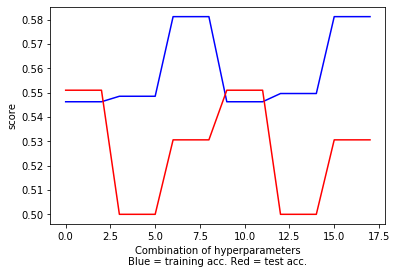

In [180]:
import matplotlib.pyplot as plt

train_result = result_set['split8_train_score']
test_result = result_set['split8_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

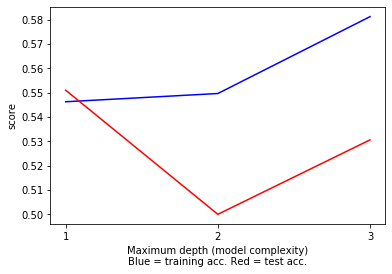

In [181]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Total number of models:  18


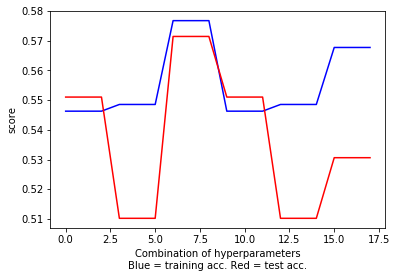

In [182]:
import matplotlib.pyplot as plt

train_result = result_set['split9_train_score']
test_result = result_set['split9_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

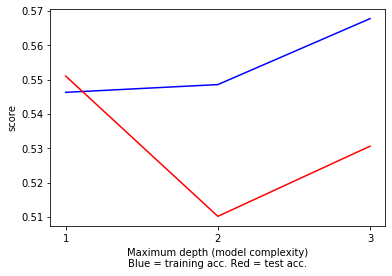

In [183]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

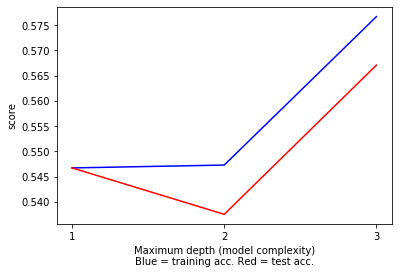

In [184]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [185]:
cv_1.fit(x_train, y_train)

print("Train accuracy:", cv_1.score(x_train, y_train))
print("Test accuracy:", cv_1.score(x_test, y_test))

Train accuracy: 0.5762195121951219
Test accuracy: 0.5894308943089431


In [186]:
import numpy as np
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name)

In [187]:
# do the feature importance and visualization analysis on GridSearchCV
from dm_tools import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv_1.best_estimator_, x.columns, 20)
visualize_decision_tree(cv_1.best_estimator_, x.columns, "optimal_tree.png")

ModuleNotFoundError: No module named 'dm_tools'

In [188]:
y_pred_dt = model.predict(x_test)
y_pred_dt_cv = cv_1.predict(x_test)

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.7032520325203252
Accuracy score on test for DT_optimal 0.5894308943089431


In [189]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(x_test)
dt_cv_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [190]:

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.4830409356725146 	 0.5169590643274854 	 0
0.4830409356725146 	 0.5169590643274854 	 0
0.4830409356725146 	 0.5169590643274854 	 1
1.0 	 0.0 	 0
0.4830409356725146 	 0.5169590643274854 	 1
0.4830409356725146 	 0.5169590643274854 	 0
0.4830409356725146 	 0.5169590643274854 	 1
0.4830409356725146 	 0.5169590643274854 	 0
0.4830409356725146 	 0.5169590643274854 	 0
0.9411764705882353 	 0.058823529411764705 	 0
0.4830409356725146 	 0.5169590643274854 	 0
0.4830409356725146 	 0.5169590643274854 	 1
0.4830409356725146 	 0.5169590643274854 	 1
0.4830409356725146 	 0.5169590643274854 	 0
0.4830409356725146 	 0.5169590643274854 	 0
1.0 	 0.0 	 0
0.4830409356725146 	 0.5169590643274854 	 1
0.9428571428571428 	 0.05714285714285714 	 0
1.0 	 0.0 	 0
0.4830409356725146 	 0.5169590643

In [191]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(x_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(x_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.7802172174840085
ROC index on test for DT_optimal: 0.6231343283582089


In [192]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

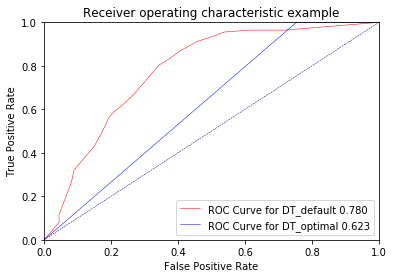

In [193]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [194]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

# Regression model

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


ModuleNotFoundError: No module named 'dm_tools'

In [197]:
#Standardization
# initialise a standard scaler object
scaler = StandardScaler()

print("Before scaling\n-------------")
for i in range(20):
 col = x_train[:,i]
 print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
 format(i, min(col), max(col), np.mean(col), np.std(col)))

x_train = scaler.fit_transform(x_train, y_train)
print("After scaling\n-------------")
for i in range(20):
 col = x_train[:,i]
 print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
 format(i, min(col), max(col), np.mean(col), np.std(col)))

x_test = scaler.transform(x_test)

NameError: name 'StandardScaler' is not defined

In [198]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
# training and test accuracy
print("Train accuracy:", model.score(x_train, y_train))
print("Test accuracy:", model.score(x_test, y_test))

# classification report on test data
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.7154471544715447
Test accuracy: 0.7357723577235772
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       134
           1       0.67      0.81      0.74       112

    accuracy                           0.74       246
   macro avg       0.74      0.74      0.74       246
weighted avg       0.75      0.74      0.74       246



In [201]:
print(model.coef_)

[[ 0.26908231 -1.02466236 -0.28728255 -0.91694227 -1.24447632 -0.14181938
  -1.02220649 -0.36239657 -0.12198747 -0.2570292  -0.19870272  0.43578702
  -0.38378741 -0.33343475  0.01847453  0.16066083 -1.92246135  0.45494096
   0.12337133  0.57346567 -0.30107262  0.30591931  0.39805474 -0.11540547
  -0.60111788  0.10905657  1.49586376 -1.58167221 -0.42749344  0.93828622
   0.99402935  0.3286928   0.15277743  0.51800283  0.38693857 -1.82967213
   1.53256671 -1.53206226  1.36342539 -1.36292093]]


In [202]:
feature_names = x.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

Proteina C reativa : 0.269082309857691
Neutrophils : -1.0246623583778476
Monocytes : -0.2872825469280468
Platelets : -0.9169422723969307
Eosinophils : -1.2444763162341936
Basophils : -0.14181937797355473
Leukocytes : -1.0222064933179114
Lymphocytes : -0.3623965660852408
Hemoglobin : -0.12198747257124111
Hematocrit : -0.2570292042753847
Mean corpuscular hemoglobin : -0.1987027204166941
Mean corpuscular hemoglobin concentration : 0.435787019923262
Mean corpuscular volume : -0.38378741361291263
Mean platelet volume : -0.3334347470059951
Red blood cell distribution width : 0.018474526096915144
Red blood Cells : 0.1606608345839348
Patient age quantile_1.0 : -1.9224613495025538
Patient age quantile_10.0 : 0.45494096181934623
Patient age quantile_11.0 : 0.12337132653936529
Patient age quantile_12.0 : 0.5734656712455153
Patient age quantile_13.0 : -0.30107262020728554
Patient age quantile_14.0 : 0.305919308534826
Patient age quantile_15.0 : 0.39805474387348366
Patient age quantile_16.0 : -0.11

In [203]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = x.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

Patient age quantile_1.0 : -1.9224613495025538
Patient age quantile_9.426829268292684 : -1.8296721266312614
Patient age quantile_2.0 : -1.5816722095612814
Influenza A rapid test_negative : 1.5325667136122945
Influenza A rapid test_positive : -1.5320622553226553
Patient age quantile_19.0 : 1.4958637552167096
Influenza B rapid test_negative : 1.3634253920144592
Influenza B rapid test_positive : -1.3629209337248196
Eosinophils : -1.2444763162341936
Neutrophils : -1.0246623583778476
Leukocytes : -1.0222064933179114
Patient age quantile_5.0 : 0.9940293535698583
Patient age quantile_4.0 : 0.9382862201002281
Platelets : -0.9169422723969307
Patient age quantile_17.0 : -0.6011178773921804
Patient age quantile_12.0 : 0.5734656712455153
Patient age quantile_8.0 : 0.5180028274396865
Patient age quantile_10.0 : 0.45494096181934623
Mean corpuscular hemoglobin concentration : 0.435787019923262
Patient age quantile_3.0 : -0.4274934418332953


In [204]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(x_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=10, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [205]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.0174201 , 0.01324005, 0.01331017, 0.01086004, 0.01091995,
       0.01954012, 0.04762073, 0.07636049, 0.07800009, 0.07834044]), 'std_fit_time': array([0.00934442, 0.00501462, 0.00489945, 0.00944709, 0.00714879,
       0.00729757, 0.02464503, 0.01661975, 0.00986636, 0.00920878]), 'mean_score_time': array([0.00281005, 0.00100005, 0.00025001, 0.00156002, 0.        ,
       0.00025001, 0.00149996, 0.        , 0.        , 0.        ]), 'std_score_time': array([0.0045624 , 0.0012248 , 0.00075002, 0.00468006, 0.        ,
       0.00075002, 0.00122471, 0.        , 0.        , 0.        ]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Total number of models:  10


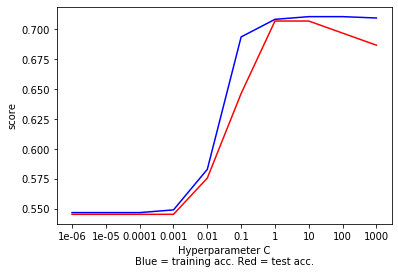

In [206]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


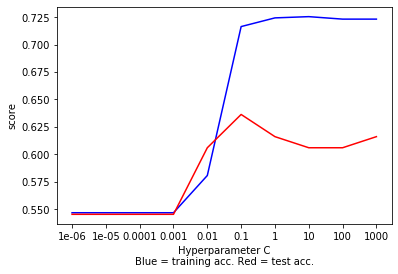

In [207]:
train_result = result_set['split1_train_score']
test_result = result_set['split1_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


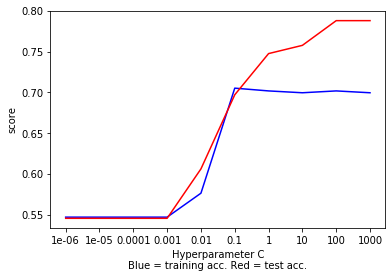

In [208]:
train_result = result_set['split2_train_score']
test_result = result_set['split2_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


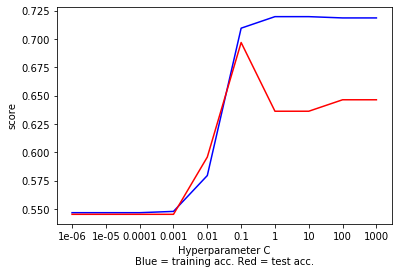

In [209]:
train_result = result_set['split3_train_score']
test_result = result_set['split3_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


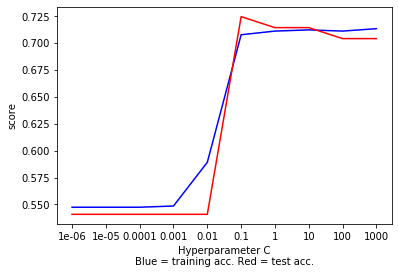

In [210]:
train_result = result_set['split4_train_score']
test_result = result_set['split4_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


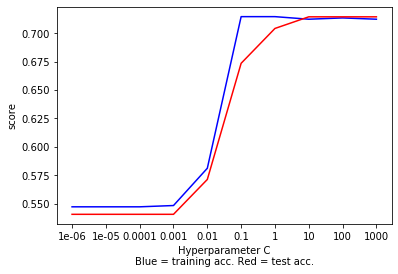

In [211]:
train_result = result_set['split5_train_score']
test_result = result_set['split5_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


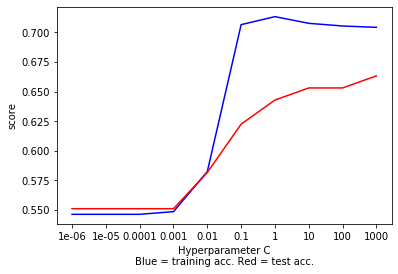

In [212]:
train_result = result_set['split6_train_score']
test_result = result_set['split6_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


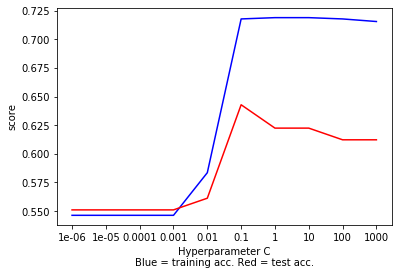

In [213]:
train_result = result_set['split7_train_score']
test_result = result_set['split7_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


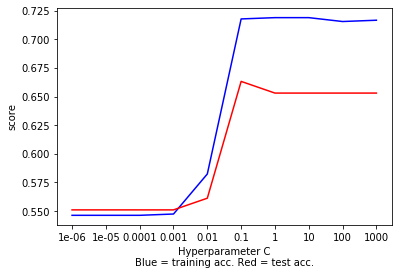

In [214]:
train_result = result_set['split8_train_score']
test_result = result_set['split8_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


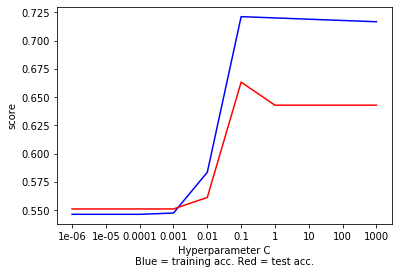

In [215]:
train_result = result_set['split9_train_score']
test_result = result_set['split9_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


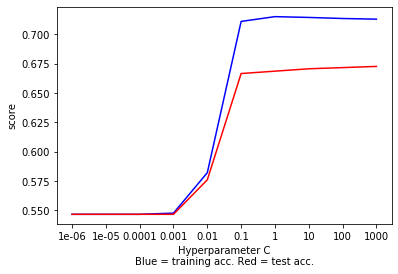

In [216]:

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [217]:
print(cv.best_params_)

{'C': 1000}


In [218]:
cv.fit(x_train, y_train)

print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))

Train accuracy: 0.709349593495935
Test accuracy: 0.7357723577235772


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [219]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(x_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", x_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 40
Number of features after elimination 23


In [221]:
x_train_sel = rfe.transform(x_train)
x_test_sel = rfe.transform(x_test)

In [222]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(x_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(x_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(x_test_sel, y_test))

y_pred = rfe_cv.predict(x_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.7052845528455285
Test accuracy: 0.7317073170731707
              precision    recall  f1-score   support

           0       0.85      0.61      0.71       134
           1       0.65      0.88      0.75       112

    accuracy                           0.73       246
   macro avg       0.75      0.74      0.73       246
weighted avg       0.76      0.73      0.73       246

{'C': 1}


In [97]:
analyse_feature_importance(cv_1.best_estimator_, x.columns)

Influenza A rapid test_negative : 0.3990042303549945
Influenza B rapid test_negative : 0.347424494071442
Patient age quantile_1.0 : 0.2429134177521585
Eosinophils : 0.010657857821405043
Mean corpuscular hemoglobin : 0.0
Patient age quantile_10.0 : 0.0
Red blood Cells : 0.0
Red blood cell distribution width : 0.0
Mean platelet volume : 0.0
Mean corpuscular volume : 0.0
Mean corpuscular hemoglobin concentration : 0.0
Influenza B rapid test_positive : 0.0
Hematocrit : 0.0
Patient age quantile_11.0 : 0.0
Lymphocytes : 0.0
Leukocytes : 0.0
Basophils : 0.0
Platelets : 0.0
Monocytes : 0.0
Neutrophils : 0.0


The output shows there are only 4 features with importance value more than 0. According to the tuned decision tree, there are only 4 important features in this dataset for prediction. This decision tree can be used to perform feature selection.

In [223]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(cv_1.best_estimator_, prefit=True)
x_train_sel_model = selectmodel.transform(x_train)
x_test_sel_model = selectmodel.transform(x_test)

print(x_train_sel_model.shape)

(984, 3)


The shape of X_train shows that only 3 feature left what the decision tree suggests. Next, train and tune another logistic regression model from this new data set and see if it improves the performance

In [224]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(x_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(x_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(x_test_sel_model, y_test))

# test the best model
y_pred = cv_sel_model.predict(x_test_sel_model)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv_sel_model.best_params_)

Train accuracy: 0.5762195121951219
Test accuracy: 0.5894308943089431
              precision    recall  f1-score   support

           0       1.00      0.25      0.40       134
           1       0.53      1.00      0.69       112

    accuracy                           0.59       246
   macro avg       0.76      0.62      0.54       246
weighted avg       0.78      0.59      0.53       246

{'C': 1}


There is decline in the accuracy performance as compared to the previously build models.

6. Comparision and finding the best performing mode

In [225]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(x_test)
y_pred_proba_lr_cv = cv.predict_proba(x_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(x_test_sel)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(x_test_sel_model)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
print("ROC index on test for `cv_sel_model`:", roc_index_cv_sel_model)


ROC index on test for `model`: 0.8061034115138593
ROC index on test for `cv`: 0.8090351812366737
ROC index on test for `rfe_cv`: 0.7956090085287847
ROC index on test for `cv_sel_model`: 0.623134328358209


In [226]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

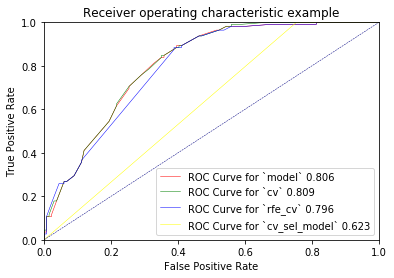

In [227]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='ROC Curve for `cv_sel_model` {:.3f}'.format(roc_index_cv_sel_model), color='yellow', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# #Neural Network

In [228]:
# Neural Network simulation

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score

# For splitting test/train set:
from sklearn.model_selection import train_test_split
# Setting number of seeds:
rs = 10
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.3, stratify = y , random_state = rs)
# Defining the model:
newmodel = MLPClassifier(max_iter=90, random_state=rs)
newmodel.fit(x_train, y_train)

# Checking the test/traning set accuracy:
print("Train accuracy:", newmodel.score(x_train, y_train))
print("Test accuracy:", newmodel.score(x_test, y_test))
y_pred = newmodel.predict(x_test)
print(classification_report(y_test, y_pred))
print(newmodel)

Train accuracy: 0.7468060394889663
Test accuracy: 0.6856368563685636
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       202
           1       0.65      0.65      0.65       167

    accuracy                           0.69       369
   macro avg       0.68      0.68      0.68       369
weighted avg       0.69      0.69      0.69       369

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=90,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [104]:
# Optimal hyperparameters with GridSearchCV

In [105]:
# For checking how many features we have:
print(x_train.shape)

(861, 40)


In [229]:
params = {'hidden_layer_sizes': [(x,) for x in range(3, 41, 10)]}


cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(x_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=10, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'h

In [230]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([1.83438358, 1.04574378, 1.21627874, 1.31034791]), 'std_fit_time': array([1.13847906, 0.12777341, 0.15864488, 0.14426816]), 'mean_score_time': array([0.00518   , 0.00025003, 0.00050004, 0.00231001]), 'std_score_time': array([0.0068866 , 0.00075009, 0.00100007, 0.0047037 ]), 'param_hidden_layer_sizes': masked_array(data=[(3,), (13,), (23,), (33,)],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (3,)}, {'hidden_layer_sizes': (13,)}, {'hidden_layer_sizes': (23,)}, {'hidden_layer_sizes': (33,)}], 'split0_test_score': array([0.64367816, 0.64367816, 0.62068966, 0.62068966]), 'split1_test_score': array([0.59302326, 0.62790698, 0.60465116, 0.59302326]), 'split2_test_score': array([0.72093023, 0.6744186 , 0.6744186 , 0.6627907 ]), 'split3_test_score': array([0.68604651, 0.70930233, 0.70930233, 0.70930233]), 'split4_test_score': array([0.75581395, 0.75581395, 0.76744186, 0.76744186]), 'sp

Total number of models:  4


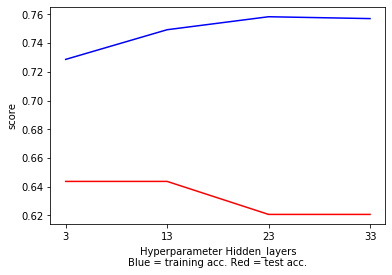

In [233]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(3, 41, 10))
plt.ylabel('score')
plt.show()

Total number of models:  4


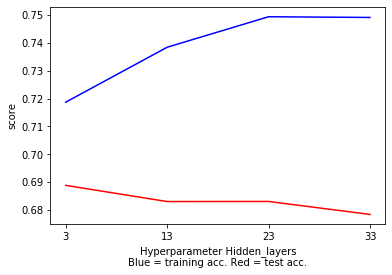

In [232]:
### Train/test bes model:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(3, 41, 10))
plt.ylabel('score')
plt.show()

In [234]:
# Test/train best model accuracy:
print("Train accuracy:", cv_1.score(x_train, y_train))
print("Test accuracy:", cv_1.score(x_test, y_test))

y_pred = cv_1.predict(x_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.7166085946573751
Test accuracy: 0.6937669376693767
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       202
           1       0.64      0.72      0.68       167

    accuracy                           0.69       369
   macro avg       0.69      0.70      0.69       369
weighted avg       0.70      0.69      0.69       369

{'hidden_layer_sizes': (3,)}


In [235]:
# Try new parameters:

params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(x_train, y_train)

print("Train accuracy:", cv_2.score(x_train, y_train))
print("Test accuracy:", cv_2.score(x_test, y_test))

y_pred = cv_2.predict(x_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.7166085946573751
Test accuracy: 0.6937669376693767
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       202
           1       0.64      0.72      0.68       167

    accuracy                           0.69       369
   macro avg       0.69      0.70      0.69       369
weighted avg       0.70      0.69      0.69       369

{'alpha': 0.001, 'hidden_layer_sizes': (3,)}


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [236]:
# Try new parameters2:

params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3.fit(x_train, y_train)

print("Train accuracy:", cv_2.score(x_train, y_train))
print("Test accuracy:", cv_2.score(x_test, y_test))

y_pred = cv_3.predict(x_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.7166085946573751
Test accuracy: 0.6937669376693767
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       202
           1       0.64      0.72      0.68       167

    accuracy                           0.69       369
   macro avg       0.69      0.70      0.69       369
weighted avg       0.70      0.69      0.69       369

{'hidden_layer_sizes': (3,)}


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [237]:
###################################################
#Recursive feature reduction using logistic regression (decreases the model performance):

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(x_train, y_train)

print("New number of features after reduction: ", rfe.n_features_)

New number of features after reduction:  20


In [238]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

# step = int((X_train_rfe.shape[1] + 5)/5);
# performing the model based on the best confuguration performed above:
params = {'hidden_layer_sizes': [(x,) for x in range(3, 41, 10)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(x_train_rfe, y_train)

print("Train accuracy:", rfe_cv.score(x_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(x_test_rfe, y_test))

y_pred = rfe_cv.predict(x_test_rfe)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Train accuracy: 0.7154471544715447
Test accuracy: 0.7046070460704607
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       202
           1       0.63      0.82      0.72       167

    accuracy                           0.70       369
   macro avg       0.72      0.71      0.70       369
weighted avg       0.73      0.70      0.70       369

{'hidden_layer_sizes': (23,)}


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [239]:
###################################################
# Feature reduction using DT GridSearchCV (decreases the model performance):

import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}


In [240]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, x.columns)

ModuleNotFoundError: No module named 'dm_tools'

In [241]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
x_train_sel_model = selectmodel.transform(x_train)
x_test_sel_model = selectmodel.transform(x_test)

print(x_train_sel_model.shape)

(861, 3)


In [242]:
params = {'hidden_layer_sizes': [(x,) for x in range(3, 41, 10)]}


cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(x_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(x_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(x_test_sel_model, y_test))

y_pred = cv_sel_model.predict(x_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.5830429732868757
Test accuracy: 0.5691056910569106
              precision    recall  f1-score   support

           0       1.00      0.21      0.35       202
           1       0.51      1.00      0.68       167

    accuracy                           0.57       369
   macro avg       0.76      0.61      0.51       369
weighted avg       0.78      0.57      0.50       369

{'hidden_layer_sizes': (23,)}


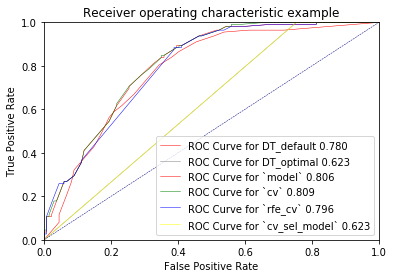

In [243]:
## task 5
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve



plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='grey', lw=0.5)
plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='ROC Curve for `cv_sel_model` {:.3f}'.format(roc_index_cv_sel_model), color='yellow', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [244]:
print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)
print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
print("ROC index on test for `cv_sel_model`:", roc_index_cv_sel_model)

ROC index on test for DT_default: 0.7802172174840085
ROC index on test for DT_optimal: 0.6231343283582089
ROC index on test for `model`: 0.8061034115138593
ROC index on test for `cv`: 0.8090351812366737
ROC index on test for `rfe_cv`: 0.7956090085287847
ROC index on test for `cv_sel_model`: 0.623134328358209


From the above given data we can see that the model made with regression model that ie.'cv' has covered maximum curve area and also the index value on test data(0.8090351812366737) hence that will be the best suitable model for this data.